<a href="https://colab.research.google.com/github/ktzh/NLPhomeworks/blob/main/Lecture02_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи к Лекции 2

__Исходные данные__

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/mlbootcamp5_train.csv",
                 sep=";",
                 index_col="id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

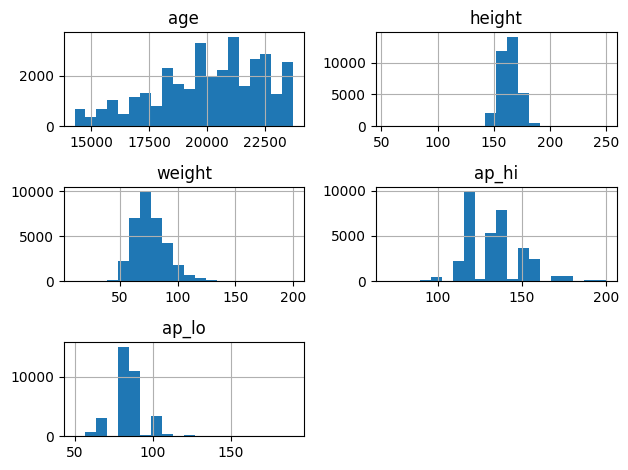

In [3]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200) & (df["ap_lo"] >= 50) & (df["ap_lo"] <= 200)]
data[data["cardio"] == 1][["age", "height", "weight", "ap_hi", "ap_lo"]].hist(bins=20)
plt.tight_layout()

68703 0.7088482307905041


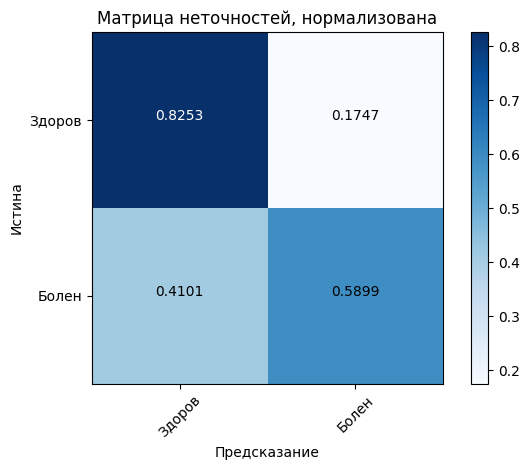

In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

train1 = data[["age", "height", "weight", "ap_hi", "ap_lo"]]
target = data["cardio"]

model1 = gnb.fit(train1, target)
predict1 = model1.predict(train1)
print(data.shape[0],
     (target == predict1).sum() / data.shape[0])

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(target, predict1)

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

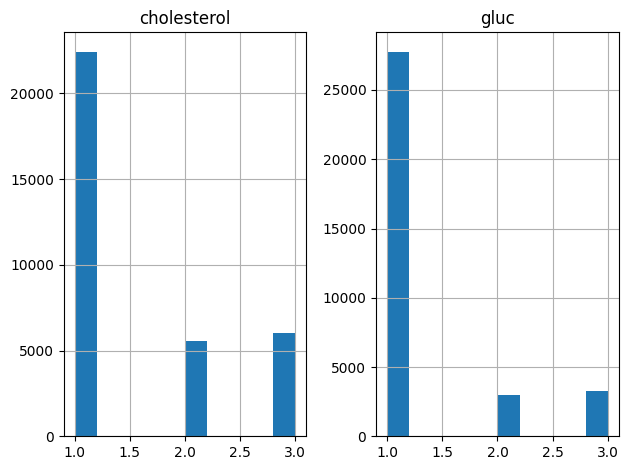

In [ ]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200) & (df["ap_lo"] >= 50) & (df["ap_lo"] <= 200)]
data[data["cardio"] == 1][["cholesterol", "gluc"]].hist(bins=10)
plt.tight_layout()

**Комментарии:** Ваши комментарии здесь.

68703 0.5655357116865348


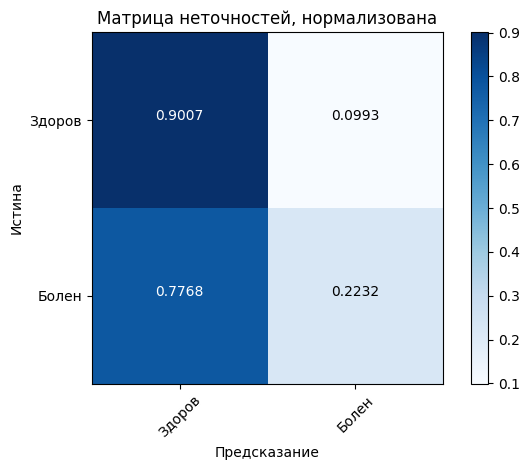

In [5]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()

train2 = data[["cholesterol", "gluc"]]
target = data["cardio"]

model2 = cnb.fit(train2, target)
predict2 = model2.predict(train2)
print(data.shape[0],
     (target == predict2).sum() / data.shape[0])

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(target, predict2)

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

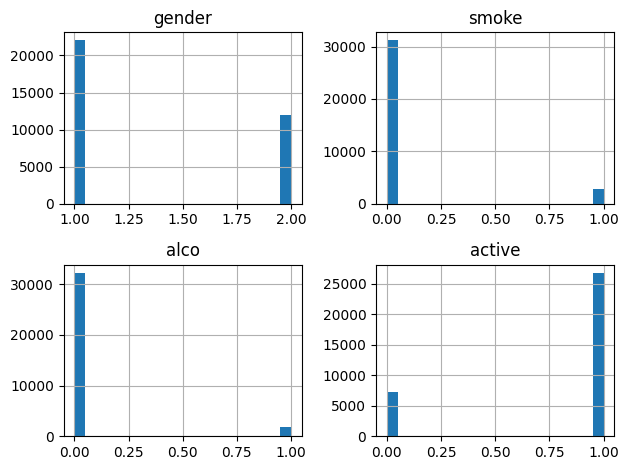

In [ ]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200) & (df["ap_lo"] >= 50) & (df["ap_lo"] <= 200)]
data[data["cardio"] == 1][["gender", "smoke", "alco", "active"]].hist(bins=20)
plt.tight_layout()

**Комментарии:** Ваши комментарии здесь.

68703 0.5176920949594632


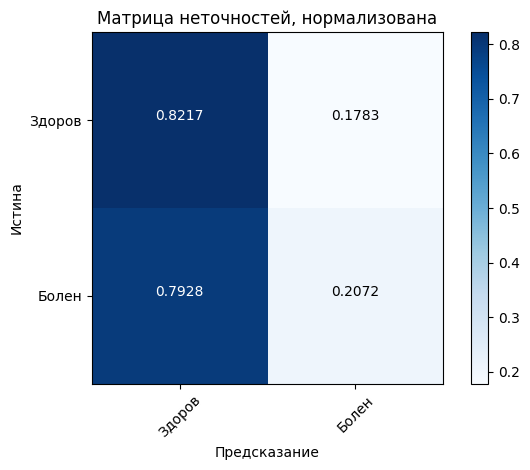

In [6]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

train3 = data[["gender", "smoke", "alco", "active"]]
target = data["cardio"]

model3 = bnb.fit(train3, target)
predict3 = model3.predict(train3)
print(data.shape[0],
     (target == predict3).sum() / data.shape[0])

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(target, predict3)

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()

**4. К этому моменту у вас есть три независимых

---

классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

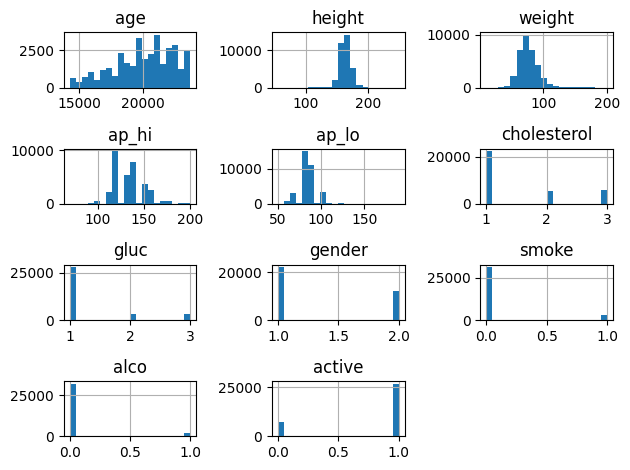

In [ ]:
data = df[(df["ap_hi"] >= 50) & (df["ap_hi"] <= 200) & (df["ap_lo"] >= 50) & (df["ap_lo"] <= 200)]
data[data["cardio"] == 1][["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "gender", "smoke", "alco", "active"]].hist(bins=20)
plt.tight_layout()

68703 0.709634222668588


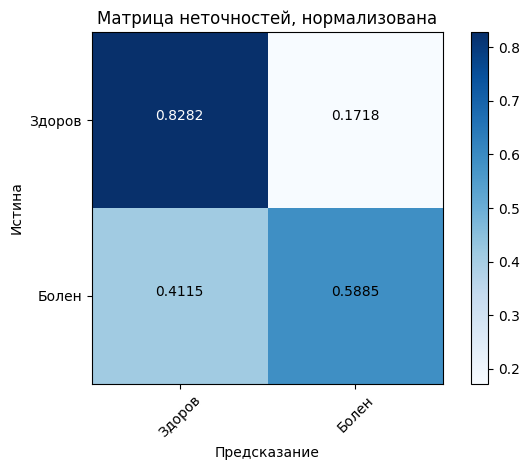

In [7]:
pred_combined = (model1.predict_proba(train1)[:, 1] + model2.predict_proba(train2)[:, 1] + model3.predict_proba(train3)[:, 1]) / 3
pred_final = (pred_combined >= 0.5).astype(int)
cnf_matrix = confusion_matrix(target, pred_final)

print(data.shape[0],
     (target == pred_final).sum() / data.shape[0])

import itertools
class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Матрица неточностей, нормализована')
plt.show()


**Комментарии:** Ваши комментарии здесь.

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [ ]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.